<img src="https://user-images.strikinglycdn.com/res/hrscywv4p/image/upload/c_limit,fl_lossy,h_300,w_300,f_auto,q_auto/1266110/Logo_wzxi0f.png" style="float: left; margin: 20px; height: 55px">

**El capital más valorado y escaso hoy en día es la atención - [Ernesto Castro](https://www.youtube.com/channel/UCd3FJ4k849ZtZXUL3MsXyOA)**

# Ensemble Methods

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Two families of ensemble methods are usually distinguished:

- In **averaging methods**, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.

    Examples: Bagging methods, Forests of randomized trees, …

- By contrast, in **boosting methods**, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

    Examples: AdaBoost, Gradient Tree Boosting, …

Source -> [scikit-learn documentation](https://scikit-learn.org/stable/modules/ensemble.html) where you can find more detailed information for each method.

## Decision Trees

[SLIDES](https://docs.google.com/presentation/d/1VNcda0Cpnq8aE25_vwoRzlXFTGGvqlj1a8n4Lkm6ARs/edit?usp=sharing)

### DT Classifier

###### Data prep

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Resources/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
y = df['Outcome']
X = df.drop('Outcome',axis=1)

In [5]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

> What does this tell us?<br>
What problem could this cause?<br>
How can we solve it?<br>

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape

(576, 8)

In [8]:
# Instatiating our folds so that we can measure performance on the same basis
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3, random_state=777, shuffle=True)

#### Basic model

In [9]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, random_state=42)

In [11]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, random_state=42)

In [12]:
probas = model.predict_proba(X_train)[:,1] # give probabilities no outcomes

0.7852591871825974


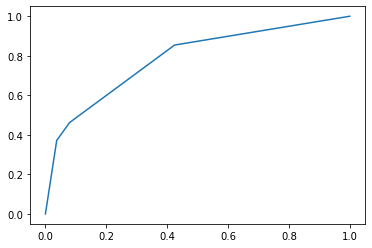

In [13]:
from sklearn.metrics import roc_curve, auc

probas = model.predict_proba(X_train)[:,1]
fpr,tpr,thr = roc_curve(y_train, probas)
plt.plot(fpr,tpr)
print(auc(fpr,tpr))

#### Attempt #1

##### Hyperparameter optimisation

In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

In [15]:
from sklearn.model_selection import GridSearchCV

# Creating an optimisation grid
param_grid = {'max_depth':range(1,8+1),
              'min_samples_leaf':[5,10,15,20,25,30]}

# Instantiating the searcher
opt_model = GridSearchCV(model, param_grid, cv=skf,
                         scoring='roc_auc', return_train_score=True)

# Fitting the learners for each parameter combination K times
opt_model.fit(X_train, y_train)

best_model = opt_model.best_estimator_

In [13]:
print('Values of the optimised hyperparameters\n for the best model found:\n',opt_model.best_params_)
print('CV performance of the best tree attempted',opt_model.best_score_)

Values of the optimised hyperparameters
 for the best model found:
 {'max_depth': 4, 'min_samples_leaf': 20}
CV performance of the best tree attempted 0.8053946740563657


> Is this Training or validation performance? <br>
How do we obtain the other metric?

0.8603961451821441


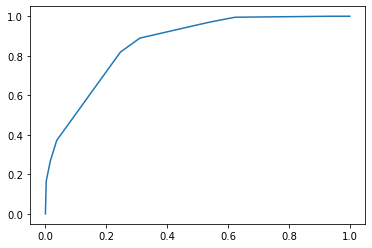

In [14]:
probas = best_model.predict_proba(X_train)[:,1]
fpr,tpr,thr = roc_curve(y_train,probas)
plt.plot(fpr,tpr)
print(auc(fpr,tpr))

##### Sanity check

In [15]:
pd.DataFrame(opt_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.003404,0.000777,0.002971,0.000474,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.685731,0.695527,0.676046,0.685768,0.007953,43,0.698773,0.733218,0.698993,0.710328,0.016185
1,0.002771,0.000037,0.002631,0.000016,1,10,"{'max_depth': 1, 'min_samples_leaf': 10}",0.685731,0.695527,0.676046,0.685768,0.007953,43,0.698773,0.733218,0.698993,0.710328,0.016185
2,0.002736,0.000008,0.002608,0.000049,1,15,"{'max_depth': 1, 'min_samples_leaf': 15}",0.685731,0.695527,0.676046,0.685768,0.007953,43,0.698773,0.733218,0.698993,0.710328,0.016185
3,0.002682,0.000027,0.002549,0.000011,1,20,"{'max_depth': 1, 'min_samples_leaf': 20}",0.685731,0.695527,0.676046,0.685768,0.007953,43,0.698773,0.733218,0.698993,0.710328,0.016185
4,0.002717,0.000019,0.002532,0.000028,1,25,"{'max_depth': 1, 'min_samples_leaf': 25}",0.685731,0.695527,0.676046,0.685768,0.007953,43,0.698773,0.733218,0.698993,0.710328,0.016185
5,0.002870,0.000109,0.002601,0.000037,1,30,"{'max_depth': 1, 'min_samples_leaf': 30}",0.685731,0.695527,0.676046,0.685768,0.007953,43,0.698773,0.733218,0.698993,0.710328,0.016185
6,0.002853,0.000004,0.002611,0.000013,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.731642,0.783430,0.743446,0.752839,0.022161,36,0.793260,0.815235,0.800797,0.803097,0.009118
7,0.003656,0.001078,0.002628,0.000083,2,10,"{'max_depth': 2, 'min_samples_leaf': 10}",0.731642,0.783430,0.743446,0.752839,0.022161,36,0.793260,0.815235,0.800797,0.803097,0.009118
8,0.003011,0.000183,0.002700,0.000154,2,15,"{'max_depth': 2, 'min_samples_leaf': 15}",0.731642,0.783430,0.743446,0.752839,0.022161,36,0.793260,0.815235,0.800797,0.803097,0.009118
9,0.002848,0.000052,0.002665,0.000029,2,20,"{'max_depth': 2, 'min_samples_leaf': 20}",0.731642,0.783430,0.743446,0.752839,0.022161,36,0.793260,0.815235,0.800797,0.803097,0.009118


In [16]:
from sklearn import tree

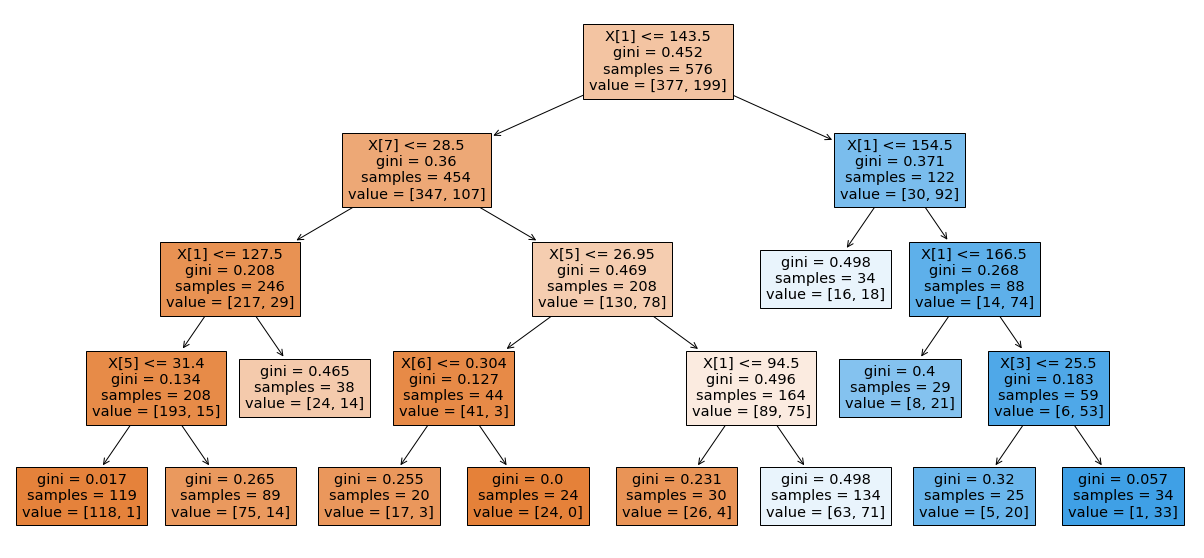

In [17]:
plt.figure(figsize=(21.33,10))
tree.plot_tree(best_model, filled=True)
plt.show()

##### Feature Importances

In [18]:
pd.DataFrame(best_model.feature_importances_, columns=['Importance'], index=X.columns)

,Importance
Pregnancies,0.000000
Glucose,0.709963
BloodPressure,0.000000
SkinThickness,0.008387
Insulin,0.000000
BMI,0.127683
DiabetesPedigreeFunction,0.004911
Age,0.149057


##### Conclusions

The slight class imbalance led to a decision tree biased towards non-diabetics<br>
Let's see what happens if we balance the classes

#### Attempt #2

##### Hyperparameter optimisation

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight='balanced')

In [18]:
from sklearn.model_selection import GridSearchCV

# Creating an optimisation grid
param_grid = {'max_depth':range(1,8+1),
              'min_samples_leaf':[5,10,15,20,25,30],
              'random_state':[42]}

# Instantiating the searcher
opt_model = GridSearchCV(model,param_grid,cv=skf,scoring='roc_auc',return_train_score=True)

# Fitting the learners for each parameter combination K times
opt_model.fit(X_train,y_train)

# Extracting the best of the trees attempted
best_model = opt_model.best_estimator_

Optimisation results

In [19]:
print('Values of the optimised hyperparameters\n for the best model found:\n',opt_model.best_params_)
print('CV performance of the best tree attempted',opt_model.best_score_)

Values of the optimised hyperparameters
 for the best model found:
 {'max_depth': 4, 'min_samples_leaf': 25, 'random_state': 42}
CV performance of the best tree attempted 0.812902258787831


Plotting the ROC curve for the RETRAINED model

0.8800834410780695


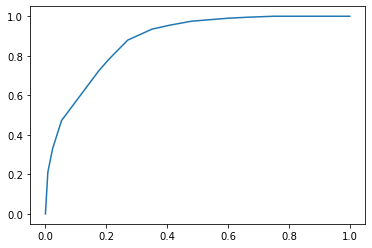

In [20]:
probas = best_model.predict_proba(X_train)[:,1]
fpr,tpr,thr = roc_curve(y_train, probas)
plt.plot(fpr,tpr)
print(auc(fpr,tpr))

##### Sanity check

In [21]:
pd.DataFrame(opt_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.002680,4.849736e-04,0.001651,4.620888e-04,1,5,42,"{'max_depth': 1, 'min_samples_leaf': 5, 'rando...",0.608836,0.695527,0.676046,0.660136,0.037136,43,0.687590,0.733218,0.698993,0.706600,0.019388
1,0.002328,4.689562e-04,0.002005,1.439797e-05,1,10,42,"{'max_depth': 1, 'min_samples_leaf': 10, 'rand...",0.608836,0.695527,0.676046,0.660136,0.037136,43,0.687590,0.733218,0.698993,0.706600,0.019388
2,0.001327,4.721585e-04,0.001995,4.052337e-07,1,15,42,"{'max_depth': 1, 'min_samples_leaf': 15, 'rand...",0.608836,0.695527,0.676046,0.660136,0.037136,43,0.687590,0.733218,0.698993,0.706600,0.019388
3,0.001662,4.698536e-04,0.001330,4.691232e-04,1,20,42,"{'max_depth': 1, 'min_samples_leaf': 20, 'rand...",0.608836,0.695527,0.676046,0.660136,0.037136,43,0.687590,0.733218,0.698993,0.706600,0.019388
4,0.001994,3.241869e-06,0.000996,8.485379e-07,1,25,42,"{'max_depth': 1, 'min_samples_leaf': 25, 'rand...",0.608836,0.695527,0.676046,0.660136,0.037136,43,0.687590,0.733218,0.698993,0.706600,0.019388
5,0.001994,1.946680e-07,0.000998,1.545129e-06,1,30,42,"{'max_depth': 1, 'min_samples_leaf': 30, 'rand...",0.608836,0.695527,0.676046,0.660136,0.037136,43,0.687590,0.733218,0.698993,0.706600,0.019388
6,0.001994,4.899036e-07,0.000997,4.495664e-07,2,5,42,"{'max_depth': 2, 'min_samples_leaf': 5, 'rando...",0.724657,0.712662,0.733105,0.723475,0.008387,42,0.794523,0.810577,0.800992,0.802030,0.006595
7,0.001995,7.867412e-07,0.001993,9.989584e-07,2,10,42,"{'max_depth': 2, 'min_samples_leaf': 10, 'rand...",0.727463,0.712662,0.733105,0.724410,0.008620,38,0.793410,0.810577,0.800992,0.801660,0.007024
8,0.001650,4.610778e-04,0.002002,1.140816e-05,2,15,42,"{'max_depth': 2, 'min_samples_leaf': 15, 'rand...",0.727463,0.712662,0.733105,0.724410,0.008620,38,0.793410,0.810577,0.800992,0.801660,0.007024
9,0.001997,2.727668e-06,0.000995,3.270962e-06,2,20,42,"{'max_depth': 2, 'min_samples_leaf': 20, 'rand...",0.727463,0.712662,0.733105,0.724410,0.008620,38,0.793410,0.810577,0.800992,0.801660,0.007024


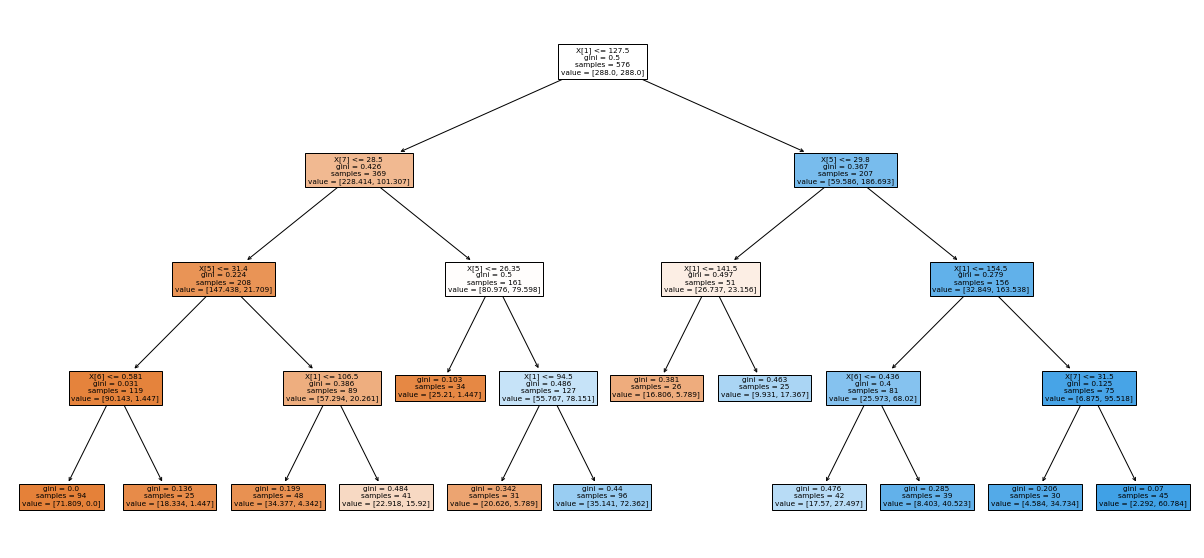

In [24]:
plt.figure(figsize=(21.33,10))
tree.plot_tree(best_model, filled=True)
plt.show()

##### Feature Importances

In [25]:
pd.DataFrame(best_model.feature_importances_, columns=['Importance'], index=X.columns)

,Importance
Pregnancies,0.000000
Glucose,0.592126
BloodPressure,0.000000
SkinThickness,0.000000
Insulin,0.000000
BMI,0.216892
DiabetesPedigreeFunction,0.018360
Age,0.172621


### DT Regressor

In [22]:
from sklearn.datasets import fetch_california_housing

In [23]:
data = fetch_california_housing()
X = pd.DataFrame(data['data'],columns=data['feature_names'])
y = pd.Series(data['target'])

In [24]:
y.value_counts()

5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.85000      1
3.93600      1
4.12300      1
4.33000      1
0.47900      1
Length: 3842, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape

(15480, 8)

In [26]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)

In [27]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [28]:
preds = model.predict(X_train)

> How do you calculate its performance metrics?<br>
- MSE
- MAE
- R-squared

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
mean_absolute_error(y_train, preds)

4.0908993103759e-17

In [31]:
mean_squared_error(y_train, preds)

9.04540120650708e-32

In [32]:
r2_score(y_train, preds)

1.0

## Random Forest

[SLIDES](https://docs.google.com/presentation/d/1Lb2GyLuJyzVNajvsd8PE6vvgnHjRo6P1oeStaxir-Z4/edit?usp=sharing)

### RF Classifier

###### Data Pre

In [35]:
y = df['Outcome'] # diabetes data
X = df.drop('Outcome',axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Hyperparameter optimisation

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [38]:
param_grid = {'max_depth':range(1,8+1),'min_samples_leaf':[5,10,15]}

opt_model = GridSearchCV(model,
                         param_grid,
                         cv=skf,
                         scoring='roc_auc',
                         return_train_score=True)
opt_model.fit(X_train,y_train)
best_model = opt_model.best_estimator_

In [39]:
print('Values of the optimised hyperparameters\n for the best model found:\n',opt_model.best_params_)
print('CV performance of the best tree attempted',opt_model.best_score_)

Values of the optimised hyperparameters
 for the best model found:
 {'max_depth': 5, 'min_samples_leaf': 15}
CV performance of the best tree attempted 0.8339409254832141


0.8004006127017792

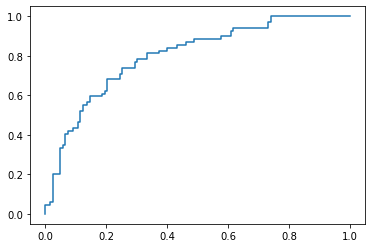

In [40]:
probas = best_model.predict_proba(X_test)
fpr,tpr,thr = roc_curve(y_test, probas[:,1])
plt.plot(fpr,tpr)
auc(fpr,tpr)

In [41]:
df.shape[0]

768

#### Exploring a tree

In [44]:
first_tree = best_model.estimators_[1]
imps = first_tree.feature_importances_
imps

array([0.03725432, 0.24195546, 0.07778639, 0.01427539, 0.05745612,
       0.35582423, 0.        , 0.21544809])

In [42]:
for i in range(100):
    first_tree = best_model.estimators_[i]
    imps = first_tree.feature_importances_
    for j in range(len(imps)):
        if imps[j]==0:
            print('missing variable at {} position {}'.format(i,j))


missing variable at 0 position 0
missing variable at 2 position 4
missing variable at 3 position 2
missing variable at 4 position 2
missing variable at 5 position 6
missing variable at 6 position 0
missing variable at 8 position 0
missing variable at 9 position 3
missing variable at 9 position 4
missing variable at 9 position 6
missing variable at 10 position 2
missing variable at 11 position 0
missing variable at 11 position 4
missing variable at 12 position 2
missing variable at 13 position 5
missing variable at 13 position 7
missing variable at 14 position 2
missing variable at 14 position 5
missing variable at 14 position 6
missing variable at 15 position 3
missing variable at 16 position 0
missing variable at 16 position 4
missing variable at 17 position 0
missing variable at 17 position 6
missing variable at 18 position 2
missing variable at 19 position 2
missing variable at 19 position 4
missing variable at 20 position 0
missing variable at 21 position 0
missing variable at 21 p

#### Sanity check

In [46]:
pd.DataFrame(opt_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.124046,0.001801,0.011724,0.000122,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.836657,0.797679,0.809163,0.814500,0.016354,23,0.845659,0.873918,0.847557,0.855711,0.012897
1,0.126457,0.004215,0.012051,0.000333,1,10,"{'max_depth': 1, 'min_samples_leaf': 10}",0.828060,0.787278,0.831650,0.815662,0.020125,22,0.851221,0.874262,0.848740,0.858074,0.011491
2,0.126788,0.000993,0.011752,0.000199,1,15,"{'max_depth': 1, 'min_samples_leaf': 15}",0.817552,0.801828,0.824014,0.814465,0.009317,24,0.849221,0.866654,0.850253,0.855376,0.007986
3,0.142323,0.021554,0.011939,0.000153,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.832000,0.790404,0.831530,0.817978,0.019499,20,0.872625,0.892820,0.871941,0.879129,0.009685
4,0.126045,0.000500,0.011805,0.000039,2,10,"{'max_depth': 2, 'min_samples_leaf': 10}",0.832358,0.793771,0.824675,0.816935,0.016677,21,0.876097,0.891921,0.865620,0.877880,0.010811
5,0.134153,0.001117,0.011874,0.000064,2,15,"{'max_depth': 2, 'min_samples_leaf': 15}",0.837134,0.792569,0.830207,0.819970,0.019581,19,0.871392,0.891681,0.869604,0.877559,0.010012
6,0.128672,0.000191,0.012048,0.000284,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.831881,0.797619,0.842593,0.824031,0.019181,15,0.895683,0.914747,0.896564,0.902331,0.008787
7,0.128901,0.000194,0.013811,0.002478,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",0.826507,0.791847,0.848004,0.822119,0.023135,17,0.889400,0.908277,0.890753,0.896143,0.008597
8,0.129449,0.000525,0.011907,0.000100,3,15,"{'max_depth': 3, 'min_samples_leaf': 15}",0.838328,0.804353,0.848485,0.830389,0.018871,4,0.885672,0.903094,0.887188,0.891985,0.007880
9,0.134336,0.003280,0.012170,0.000035,4,5,"{'max_depth': 4, 'min_samples_leaf': 5}",0.837970,0.789683,0.850409,0.826021,0.026192,13,0.922860,0.937094,0.921637,0.927197,0.007016


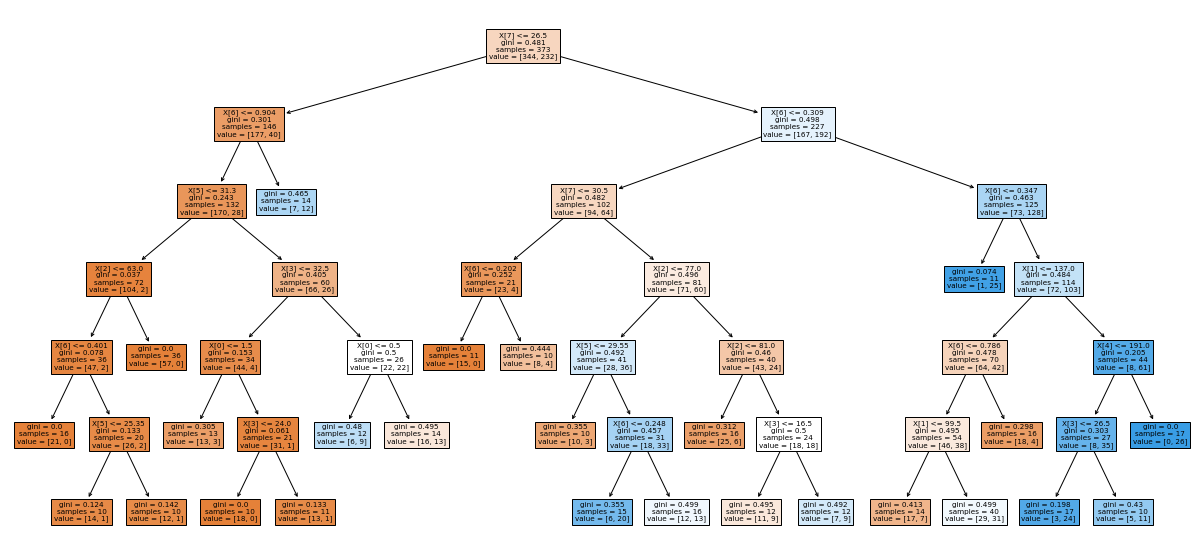

In [47]:
plt.figure(figsize=(21.33,10))
tree.plot_tree(first_tree, filled=True)
plt.show()

#### Feature Importances

In [48]:
pd.DataFrame(best_model.feature_importances_, columns=['Importance'], index=X.columns)

,Importance
Pregnancies,0.062468
Glucose,0.365316
BloodPressure,0.042733
SkinThickness,0.046555
Insulin,0.060028
BMI,0.182287
DiabetesPedigreeFunction,0.074243
Age,0.166370


## Big Picture

[SLIDES](https://docs.google.com/presentation/d/1H44m8fhfJetjb8rtl-9Z0EPuw5AWtJperTjygKgzoU4/edit?usp=sharing)

A repository where you can see code for performing boosting methods [Repository](https://github.com/learn-co-students/boosting_seattle-sf-chicago-ds)